In [1]:
#https://www.cs.toronto.edu/~kriz/cifar.html

In [2]:
#https://drive.google.com/file/d/1H-2VnHf_J--NDq6J2LNMDpObZZRoDVrD/view?usp=sharing

![picture](https://drive.google.com/uc?export=view&id=1H-2VnHf_J--NDq6J2LNMDpObZZRoDVrD)

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# USING ANN
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
print(x_train.shape); print(x_test.shape);print(y_train.shape);print(y_test.shape);

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


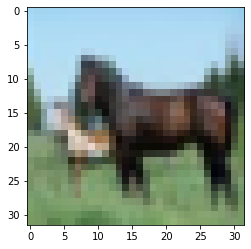

In [5]:
plt.figsize=(5,5)
plt.imshow(x_train[12])

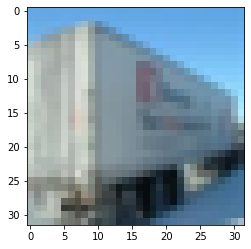

In [4]:
plt.figsize=(5,5)
plt.imshow(x_train[15])

In [6]:
print(x_train[12])

[[[164 215 244]
  [162 212 240]
  [162 212 240]
  ...
  [157 210 237]
  [153 208 235]
  [153 203 234]]

 [[168 218 245]
  [166 215 242]
  [166 215 242]
  ...
  [164 212 238]
  [160 209 236]
  [158 205 235]]

 [[172 220 246]
  [170 217 243]
  [171 218 244]
  ...
  [168 212 238]
  [165 208 235]
  [163 207 236]]

 ...

 [[123 160 105]
  [117 154 102]
  [112 149  99]
  ...
  [117 136 100]
  [ 95 115  79]
  [120 149 100]]

 [[120 156 100]
  [116 151  99]
  [112 147  96]
  ...
  [126 149 110]
  [120 144 103]
  [120 152 101]]

 [[121 154  96]
  [120 152  99]
  [116 148  97]
  ...
  [124 152 108]
  [124 154 107]
  [120 154 100]]]


In [5]:
x_train=(x_train)/255
x_test=(x_test)/255
# Normalize to make every element value in between 0 till 1.

In [6]:
print(x_train[12])

[[[0.64313725 0.84313725 0.95686275]
  [0.63529412 0.83137255 0.94117647]
  [0.63529412 0.83137255 0.94117647]
  ...
  [0.61568627 0.82352941 0.92941176]
  [0.6        0.81568627 0.92156863]
  [0.6        0.79607843 0.91764706]]

 [[0.65882353 0.85490196 0.96078431]
  [0.65098039 0.84313725 0.94901961]
  [0.65098039 0.84313725 0.94901961]
  ...
  [0.64313725 0.83137255 0.93333333]
  [0.62745098 0.81960784 0.9254902 ]
  [0.61960784 0.80392157 0.92156863]]

 [[0.6745098  0.8627451  0.96470588]
  [0.66666667 0.85098039 0.95294118]
  [0.67058824 0.85490196 0.95686275]
  ...
  [0.65882353 0.83137255 0.93333333]
  [0.64705882 0.81568627 0.92156863]
  [0.63921569 0.81176471 0.9254902 ]]

 ...

 [[0.48235294 0.62745098 0.41176471]
  [0.45882353 0.60392157 0.4       ]
  [0.43921569 0.58431373 0.38823529]
  ...
  [0.45882353 0.53333333 0.39215686]
  [0.37254902 0.45098039 0.30980392]
  [0.47058824 0.58431373 0.39215686]]

 [[0.47058824 0.61176471 0.39215686]
  [0.45490196 0.59215686 0.38823529]


In [9]:
#ANN MOdel.
ann=models.Sequential([layers.Flatten(input_shape=(32,32,3)),
                       layers.Dense(3000,activation='relu'),
                       layers.Dense(1000,activation='relu'),
                       layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 104s 66ms/step - loss: 1.8137 - accuracy: 0.3549
Epoch 2/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.6232 - accuracy: 0.4280
Epoch 3/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.5379 - accuracy: 0.4563
Epoch 4/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.4799 - accuracy: 0.4780
Epoch 5/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4305 - accuracy: 0.4967


In [10]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 8s 24ms/step - loss: 1.4749 - accuracy: 0.4805


[1.4748501777648926, 0.4805000126361847]

In [13]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report:\n",classification_report(y_test,y_pred_classes))
#Accuracy is very low=0.48 
## so we need to do CNN.

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.44      0.50      1000
           1       0.52      0.66      0.58      1000
           2       0.47      0.22      0.30      1000
           3       0.39      0.26      0.31      1000
           4       0.46      0.35      0.40      1000
           5       0.46      0.29      0.36      1000
           6       0.52      0.57      0.55      1000
           7       0.46      0.60      0.53      1000
           8       0.47      0.75      0.58      1000
           9       0.44      0.66      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.46     10000
weighted avg       0.48      0.48      0.46     10000



In [ ]:
#https://drive.google.com/file/d/1gRKa-O9X8SFJtPl3rNsxlKFcAbyXqqcl/view?usp=sharing

![picture](https://drive.google.com/uc?export=view&id=1gRKa-O9X8SFJtPl3rNsxlKFcAbyXqqcl)

In [15]:
#############
# ANN is not giving good accuracy 
# So CNN MOdel .
# AS LIKE ABOVE PICTURE ONLY WE ARE MAKING LAYERS IN BELOW CNN.
cnn=models.Sequential([
                       
#CNN will select filter automatically / by its own.
                       # layer1
                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                       layers.MaxPooling2D((2,2)),

                       # layer2
                       layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                       layers.MaxPooling2D((2,2)),

                       layers.Flatten(),
                       layers.Dense(64,activation='relu'),
                       layers.Dense(10,activation='softmax')
])


In [17]:
cnn.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [18]:
cnn.fit(x_train,y_train,epochs=7)

Epoch 1/7
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4595 - accuracy: 0.4744
Epoch 2/7
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0939 - accuracy: 0.6186
Epoch 3/7
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9680 - accuracy: 0.6653
Epoch 4/7
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8856 - accuracy: 0.6948
Epoch 5/7
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8186 - accuracy: 0.7169
Epoch 6/7
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7598 - accuracy: 0.7381
Epoch 7/7
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7152 - accuracy: 0.7505


In [19]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9132 - accuracy: 0.6840


[0.9131618142127991, 0.6840000152587891]

In [20]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [23]:
y_pred=cnn.predict(x_test)
#y_pred

In [24]:
y_class=[np.argmax(i) for i in y_pred]
y_class[:5]

[3, 8, 8, 0, 6]

In [26]:
print('Classification:',classification_report(y_test,y_class))

Classification:               precision    recall  f1-score   support

           0       0.65      0.81      0.72      1000
           1       0.81      0.82      0.82      1000
           2       0.48      0.69      0.57      1000
           3       0.48      0.56      0.52      1000
           4       0.73      0.50      0.59      1000
           5       0.64      0.52      0.57      1000
           6       0.78      0.75      0.77      1000
           7       0.80      0.72      0.76      1000
           8       0.83      0.75      0.79      1000
           9       0.81      0.73      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.69     10000
weighted avg       0.70      0.68      0.69     10000

